# Numpy and Matplotlib

## Reference documents

1. <A HREF="http://wiki.scipy.org/Tentative_NumPy_Tutorial">Tentative Numpy Tutorial</A>
2. <A HREF="http://docs.scipy.org/doc/numpy/reference">NumPy Reference</A>
3. <A HREF="http://mathesaurus.sourceforge.net/matlab-numpy.html">NumPy for MATLAB Users</A>
4. <A HREF="http://mathesaurus.sourceforge.net/r-numpy.html">NumPy for R (and S-Plus) Users</A>
5. <A HREF="http://people.duke.edu/~ccc14/pcfb/numerics.html">NumPy and Matplotlib (Practical Cumputing for Biologists)</A>
6. <A HREF="http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html">Matplotlib: Plotting</A>

## What is Numpy?

While the Python language is an excellent tool for general-purpose programming, it was not designed specifically for mathematical and scientific computing.  Numpy allows for:

* Efficient array computing in Python
* Efficient indexing/slicing of arrays
* Mathematical functions that operate on an entire array

The critical thing to know is that Python **for** loops are very slow! One should try to use array-operations as much as possible.

First, let's import the **numpy** module. There are multiple ways we can do this. In the following examples, <code>zeros</code> is a **numpy** routine which we will see later, and depending on how we import numpy we call it in different ways:

* <code>'import numpy' </code>  imports the entire numpy module --> <code>'numpy.zeros()' </code>
* <code>'import numpy as np' </code> imports the entire numpy module and renames it --> <code>'np.zeros()' </code>
* <code>'from numpy import *' </code> imports the entire numpy module (more or less) --> <code>'zeros()' </code>
* <code>'from numpy import zeros' </code> imports *only* the <code>zeros()</code> routine

After all that preamble, let's get started:

In [ ]:
import numpy as np

###Creating numpy arrays

You can create an array from scratch, similar to how you might create a list / tuple / whatever:

In [ ]:
a = np.array([1,2,3])    # or np.array((1,2,3))
print a

You can also convert a list or tuple of elements into an array:

In [ ]:
myList = [0.2, 0.4, 0.6]
myArray = np.array(myList)
print myList
print myArray

In [ ]:
print type(myArray)

In [ ]:
print myArray.dtype

Arrays can be created with non-numbers as well, but all the elements of an array have to have the same type. i.e., arrays are *homogeneous*. Once an array has been created, its dtype is fixed and it can only store elements of the same type. However, the dtype can explicitly be changed (we'll see this later).

In [ ]:
# an array of booleans

print np.array([True, False, True])

In [ ]:
# an array of characters/strings

print np.array(['a', 'b', 'c'])

In [ ]:
print np.array([2, 3, 'c'])

In [ ]:
print np.array([2, 3, 0.4])

In [ ]:
print np.array([2, 3, 'c'], dtype=int)

You can access elements of an array in the same way you access elements of a list:

In [ ]:
print myArray[0]

In [ ]:
print myArray[-1]

In [ ]:
print myArray[1:]

Multidimensional arrays work like you might expect:

In [102]:
newArray = np.array([ [3, 8, 0, 1],
                      [4, 0, 0, 9],
                      [2, 2, 7, 1],
                      [5, 1, 0, 8]] )
print newArray
print newArray.shape

[[3 8 0 1]
 [4 0 0 9]
 [2 2 7 1]
 [5 1 0 8]]
(4, 4)


In [103]:
print newArray[0]

[3 8 0 1]


In [104]:
print newArray[1,3]

9


In [105]:
print newArray[3,0:2]

[5 1]


In [108]:
print newArray[:,0]   # print out an individual column

[3 4 2 5]


If you know the size of the array you want, you can create an array of ones or zeros or an empty array:

In [ ]:
b = np.ones((3,2))
print b
print b.shape

In [ ]:
c = np.zeros((1,3), int)
print c
print type(c)
print c.dtype

In [ ]:
d = np.zeros(3, complex)
print d
print d.dtype

In [ ]:
# slightly faster, but be careful to fill it with actual values!

f = np.empty(4)
f.fill(3.14)
f[-1] = 0
print f

Create an identity array:

In [ ]:
print np.eye(5, dtype=int)    # default data type is 'float'

### Number generation

Here are a few ways to generate uniformly spaced numbers over an interval (including both endpoints), similar to <code>range()</code>:

In [ ]:
print np.arange(-5, 5, 0.5)    # excludes upper endpoint

In [ ]:
print np.linspace(-3, 3, 7)     # includes both endpoints

In [ ]:
print np.logspace(1, 4, 4)

Some examples of random number generation using numpy

In [ ]:
print np.random.rand(10)
print np.random.rand(2,2)

In [ ]:
print np.random.randint(2,100,5)

In [ ]:
print np.random.normal(10, 3, (2,4))

In [ ]:
print np.random.randn(5)    # samples 5 times from the standard normal distribution

In [ ]:
print np.random.normal(3, 1, 5)    # samples 5 times from a Gaussian with mean 3 and std dev 1

### Working with and manipulating arrays

In [ ]:
print newArray

In [ ]:
print newArray.reshape(2,8)

In [ ]:
print newArray.reshape(-1,2)

None of these manipulations have modified the original newArray:

In [ ]:
print newArray

In [ ]:
reshapedArray = newArray.reshape(2,8)
print reshapedArray
print newArray

Above we saw how to index arrays with single numbers and slices, just like Python lists.  But arrays allow for a more sophisticated kind of indexing which is very powerful: you can index an array with another array, and in particular with an array of boolean values.  This is particluarly useful to extract information from an array that matches a certain condition.

In [ ]:
redshifts =  np.array((0.2, 1.56, 6.3, 0.003, 0.9, 4.54, 1.1))

In [ ]:
close = redshifts < 1
print close
print redshifts[close]

In [ ]:
far = np.where(redshifts > 2)
print far
print redshifts[far]

In [ ]:
middle = np.where( (redshifts >= 1) & (redshifts <= 2) )
print middle
print redshifts[middle]

In [ ]:
(redshifts >= 1) & (redshifts <= 2)

### Mathematical operations on arrays

Math with arrays is straightforward and easy. For instance, let's say we want to multiply every number in a group by 3. If we try to do that with a list:

In [ ]:
myList = [3, 6, 7, 2]
print 2*myList

In [ ]:
myArray = np.array([3, 6, 7, 2])
print 2*myArray

In general, mathematical operations on arrays are done **element-by-element**:

In [ ]:
arr1 = np.arange(4)
arr2 = np.arange(10,14)
print arr1
print arr2

In [ ]:
print arr1 + arr2
print arr1 - arr2
print arr1 * arr2
print arr1 / arr2

Notice in particular that multiplication is element-wise and is NOT a dot product or regular matrix multiplication.

In [ ]:
print 3.5 + arr1

In the last example, numpy understood the command to be "add 3.5 to every element in arr1." That is, it converts the scalar 3.5 into an array of the appropriate size. Since the new array is filled with floats, and arr1 is filled with ints, the summed array is an array of floats.

### Broadcasting with numpy

The broadcasting rules allow numpy to:

* *create* new dimensions of length 1 (since this doesn't change the size of the array)
* 'stretch' a dimension of length 1 that needs to be matched to a dimension of a different size.

So in the above example, the scalar 1.5 is effectively:

* first 'promoted' to a 1-dimensional array of length 1
* then, this array is 'stretched' to length 4 to match the dimension of `arr1`.

After these two operations are complete, the addition can proceed as now both operands are one-dimensional arrays of length 4.

This broadcasting behavior is in practice enormously powerful, especially because when numpy broadcasts to create new dimensions or to 'stretch' existing ones, it doesn't actually replicate the data.  In the example above the operation is carried *as if* the 1.5 was a 1-d array with 1.5 in all of its entries, but no actual array was ever created.  This can save lots of memory in cases when the arrays in question are large and can have significant performance implications.

In [ ]:
arr1 += 10
print arr1

In [ ]:
arr1.fill(0)
print arr1

In [ ]:
print arr2
print np.mean(arr2), arr2.mean()
print np.sum(arr2), arr2.sum()
print np.min(arr2), arr2.min()

### Numpy I/O with arrays

Numpy makes it easy to write arrays to files and read them. It can write both text and binary files. In a text file, the number $\pi$ could be written as "3.141592653589793", for example: a string of digits that a human can read, with in this case 15 decimal digits.  In contrast, that same number written to a binary file would be encoded as 8 characters (bytes) that are not readable by a human but which contain the exact same data that the variable `pi` had in the computer's memory.

* Text mode: occupies more space, precision can be lost (if not all digits are written to disk), but is readable and editable by hand with a text editor.  Can *only* be used for one- and two-dimensional arrays.

* Binary mode: compact and exact representation of the data in memory, can't be read or edited by hand.  Arrays of any size and dimensionality can be saved and read without loss of information.

In the following examples, we'll only be talking about reading and writing arrays in text mode.

In [36]:
arr3 = np.random.rand(6,5)
print arr3

[[ 0.11069756  0.17414576  0.24673244  0.14641129  0.11781869]
 [ 0.27218407  0.60925433  0.38028085  0.17237792  0.66055813]
 [ 0.96892908  0.09978776  0.45430937  0.14529278  0.1753558 ]
 [ 0.4070488   0.94395658  0.07596136  0.52662828  0.17770052]
 [ 0.74562311  0.36088415  0.71540796  0.40082648  0.12976091]
 [ 0.13369702  0.3628988   0.84613061  0.88850922  0.86114376]]


In [37]:
np.savetxt('arrayFile.txt', arr3, fmt='%.2e')

In [38]:
arr4 = np.loadtxt('arrayFile.txt')

In [39]:
print arr4

[[ 0.111   0.174   0.247   0.146   0.118 ]
 [ 0.272   0.609   0.38    0.172   0.661 ]
 [ 0.969   0.0998  0.454   0.145   0.175 ]
 [ 0.407   0.944   0.076   0.527   0.178 ]
 [ 0.746   0.361   0.715   0.401   0.13  ]
 [ 0.134   0.363   0.846   0.889   0.861 ]]


In [46]:
## what if we want to skip the first and last rows? Or we just want columns 2 and 3?
arr5 = np.genfromtxt('arrayFile.txt', skip_header=1, skip_footer=1, usecols=(2,3))

In [47]:
print arr5

[[ 0.38   0.172]
 [ 0.454  0.145]
 [ 0.076  0.527]
 [ 0.715  0.401]]


## What is Matplotlib?

The [matplotlib](http://matplotlib.org) library is a powerful tool capable that can quickly produce simple plots for data visualization as well as complex publication-quality figures with fine layout control. Here, we will only provide a minimal introduction, but Google is your friend when it comes to creating the perfect plots.  The pyplot tutorial (http://matplotlib.org/users/pyplot_tutorial.html) is a great place to get started, and the matplotlib gallery (http://matplotlib.org/gallery.html) has tons of information as well.

Just as we typically use the shorthand `np` for Numpy, we will use `plt` for the `matplotlib.pyplot` module where the plotting functions reside.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

To plot a collection of x- and y-values:

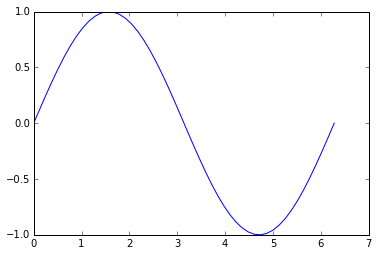

In [71]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
plt.plot(x, y)

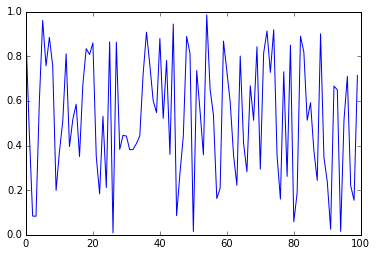

In [72]:
### If you don't give it x values:
plt.plot(np.random.rand(100))

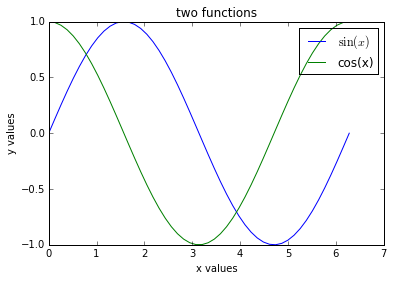

In [73]:
### Multiple data sets on the same plot
# the semicolon at the end suppresses the display of some usually unnecessary information

plt.plot(x, np.sin(x), label=r'$\sin(x)$')
plt.plot(x, np.cos(x), label='cos(x)')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('two functions')
plt.legend();

Notice how matplotlib automatically assigned different colors to the two data sets. We can finetune what these look like:

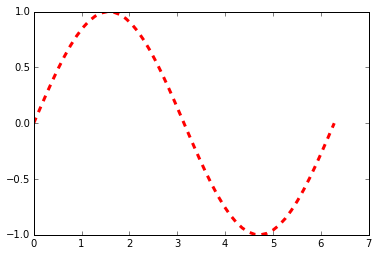

In [74]:
plt.plot(x, np.sin(x), linewidth=3, color='red', linestyle='--')

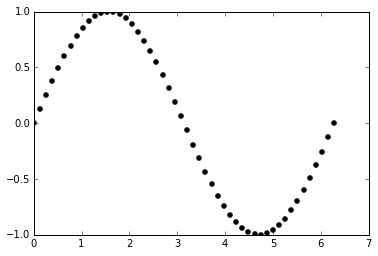

In [75]:
plt.plot(x, np.sin(x), 'o', markersize=5, color='k')

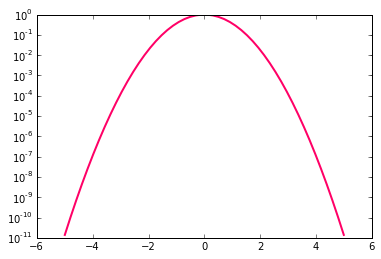

In [76]:
### logarithmic plots
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.semilogy(x,y, lw=2, color='#ff0066')

(0.01, 10.0)

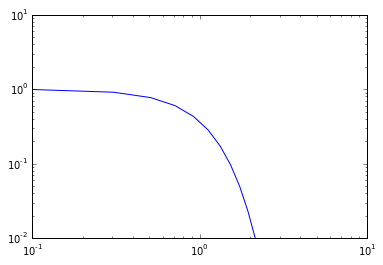

In [77]:
plt.loglog(x,y)
plt.xlim(1e-1, 1e1)
plt.ylim(1e-2, 1e1)

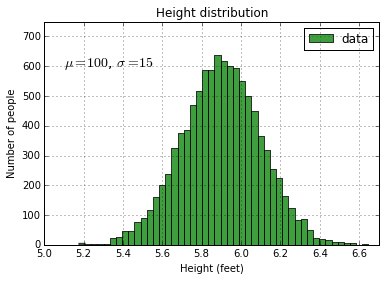

In [78]:
# A more complicated example

mu, sigma = 5.9, 0.2
measurements = mu + sigma * np.random.randn(10000)

# the histogram of the data
plt.hist(measurements, 50, normed=False, facecolor='g', alpha=0.75, label='data')

plt.xlabel('Height (feet)')
plt.ylabel('Number of people')
plt.title('Height distribution')
# This will put a text fragment at the position given:
plt.text(5.1, 600, r'$\mu=100$, $\sigma=15$', fontsize=14)
plt.axis([5,6.7,0,750])
plt.grid(True)
plt.legend()

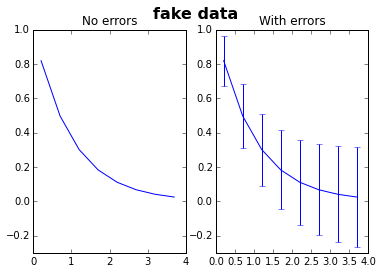

In [79]:
### Error bars and subplots

# generate some fake data, with errors in y
x = np.arange(0.2, 4, 0.5)
y = np.exp(-x)
errors = 0.1 + 0.1*np.sqrt(x)


fig = plt.figure()

noErrs = fig.add_subplot(121)
plt.plot(x, y)
plt.xticks((0,1,2,3,4))
noErrs.set_title('No errors')
noErrs.set_ylim(-0.3,1)

withErrs = fig.add_subplot(122)
withErrs.errorbar(x, y, yerr=errors)
withErrs.set_title('With errors')
plt.ylim(-0.3,1)
plt.xticks(np.arange(0,4.5,0.5))

fig.suptitle('fake data', size=16, weight='bold')

<matplotlib.colorbar.Colorbar instance at 0x7f1f9e66a560>

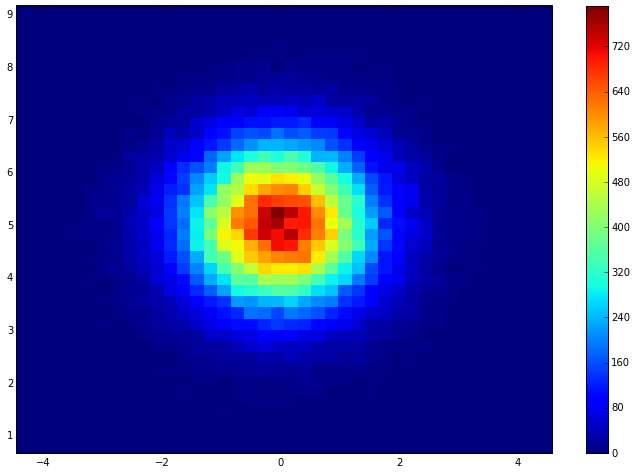

In [67]:
# normal distribution center at x=0 and y=5
x = np.random.randn(100000)
y = np.random.randn(100000)+5

# let's make this plot bigger
plt.figure(figsize=(12,8))
plt.hist2d(x, y, bins=40)
plt.colorbar()

### A final note

Since we often need to use numpy + matplotlib (+ SciPy + others) at the same time, we can import all of these modules at once using a single command. Instead of:

        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        
etc., just use:

        %pylab inline

## Breakout session

We want to reproduce the Global Land-Ocean Temperature index plot below (available at this <A HREF="http://data.giss.nasa.gov/gistemp/graphs_v3/"> GISS website</A>). Download the data <A HREF="http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A2.txt">this link</A> and recreate the plot **as closely as you can** (don't worry about the two green points or matching the font). We've broken up this problem into steps to get you started. Feel free to follow them as you wish, or be a lone wolf and solve this on your own.

<img src="http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A2.gif">


1. Save the data as a text file, and then read the data into a numpy array. You'll have to deal with the extra lines at the top and bottom of the file, as well as the missing values (the asterixes) that appear. There are multiple ways to solve these problems; do what works for you. If you get stuck, remember that we talked about slicing arrays at the beginning of this lecture.
2. Plot "Annual Mean" as a set of black squares connected by a thick black line. Try Googling something about "matplotlib square markers". Don't forget to give it a label so it can go in the legend later.
3. Plot "5-Year Running Mean" as a thick red line. Don't forget the label.
4. Set the x and y ranges of your plot so that they match the ones in the plot we are trying to recreate.
5. Add a grid. The default grid that shows up is fine; don't worry about making it match *exactly*.
6. Label the y axis. Don't worry about the "degree" symbol for now.
7. Add the title.
8. Add the legend (default settings are fine).

BONUS TASKS:
1. Notice how, in the the plot above, there are labels at every 20 years along the x axis but grid marks at every ten (and similar for the y axis)? Figure out how to recreate this.
2. On that note, match the formatting they have for the y axis ticks.
3. Make all the font sizes match (yours are probably smaller than you'd like).
4. Add in the "degree" symbol for the y axis label. Hint: LaTeX or unicode.
5. Move the legend to the right place. Remove the box (the "frame") that surrounds the legend. Notice how your legend has a line with *two* markers for "Annual mean" and their legend has a line with only one marker? Match that.
6. Move the title up a little bit so the spacing better matches the plot above.